## Stock Market API project

#### Rapid API URL - https://rapidapi.com/alphavantage/api/alpha-vantage

In [3]:
%pip install python-dotenv plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
import os 
api_key = os.getenv("API_KEY")

In [8]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

response.json()["bestMatches"]

[{'1. symbol': 'SBIN.BSE',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBKFF',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'United States',
  '5. marketOpen': '09:30',
  '6. marketClose': '16:00',
  '7. timezone': 'UTC-04',
  '8. currency': 'USD',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SID.FRK',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'Frankfurt',
  '5. marketOpen': '08:00',
  '6. marketClose': '20:00',
  '7. timezone': 'UTC+02',
  '8. currency': 'EUR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBID.LON',
  '2. name': 'State Bank of India GDR',
  '3. type': 'Equity',
  '4. region': 'United Kingdom',
  '5. marketOpen': '08:00',
  '6. marketClose': '16:30',
  '7. timezone': 'UTC+01',
  '8. currency': 'USD',
  '9. mat

#### Create a class StockFetch
##### 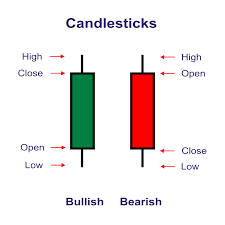

In [9]:
import pandas as pd
import plotly.graph_objects as go

In [10]:
class StockFetch:

    def __init__(self, api_key) -> None:
        self.api_key = api_key
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": self.api_key, 
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
        }

    def symbol_search(self, company):
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()["bestMatches"]
        df = pd.DataFrame(data)
        return df
    
    def daily_data(self, symbol):
        querystring = {
            "function":"TIME_SERIES_DAILY",
            "symbol":symbol,
            "outputsize":"compact",
            "datatype":"json"
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        df = pd.DataFrame(response.json()["Time Series (Daily)"]).T
        df.index = pd.to_datetime(df.index)
        for i in df.columns:
            df[i] = df[i].astype(float)

        return df 
    
    def plot_chart(self, symbol):
        df = self.daily_data(symbol)
        fig = go.Figure(data=[
            go.Candlestick(
                x = df.index,
                open = df["1. open"],
                high = df["2. high"],
                low = df["3. low"],
                close = df["4. close"]
            )
        ])
        fig.update_layout(width=1000, height=800)
        fig.show()

In [11]:
client = StockFetch(api_key = os.getenv("API_KEY"))

In [12]:
df1 = client.symbol_search(company="HDFC Bank")
df1

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,HDB,HDFC Bank Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.8182
1,HDFCBANK.BSE,HDFC Bank Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.8000
2,H1DB34.SAO,HDFC Bank Limited,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6923
3,HDFA.FRK,HDFC Bank Limited,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6923


In [13]:
df1.to_csv("Symbol.csv", index=False)

In [14]:
df2 = client.daily_data(symbol="HDFCBANK.BSE")
df2

,1. open,2. high,3. low,4. close,5. volume
2024-10-16,1682.05,1707.65,1680.00,1700.00,300461.0
2024-10-15,1692.55,1698.00,1675.65,1684.40,250762.0
2024-10-14,1658.00,1692.00,1654.95,1688.50,772437.0
2024-10-11,1664.00,1665.05,1643.20,1650.25,554980.0
2024-10-10,1643.00,1665.00,1633.00,1662.30,314242.0
...,...,...,...,...,...
2024-05-30,1500.00,1524.00,1498.25,1514.60,335390.0
2024-05-29,1523.55,1523.85,1501.70,1507.85,1320000.0
2024-05-28,1527.95,1535.45,1524.90,1530.50,600350.0
2024-05-27,1523.35,1544.95,1519.00,1527.95,1040000.0


In [15]:
df2.to_csv("HDFCBank.csv")

In [16]:
client.plot_chart(symbol="HDFCBANK.BSE")

In [17]:
df3 = client.symbol_search(company="Godrej")
df3

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,GODREJCP.BSE,GODREJ CONSUMER PRODUCTS LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.7059
1,GODREJIND.BSE,GODREJ INDUSTRIES LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6667
2,GODREJAGRO.BSE,Godrej Agrovet Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6316
3,GODREJPROP.BSE,Godrej Properties Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6316
4,540743.BSE,Godrej Agrovet Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4286
5,532424.BSE,Godrej Consumer Products Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.3158


In [18]:
df4 = client.daily_data(symbol="GODREJIND.BSE")
df4

,1. open,2. high,3. low,4. close,5. volume
2024-10-16,1059.75,1070.90,1017.35,1057.25,15857.0
2024-10-15,1134.00,1134.00,1032.95,1043.65,10827.0
2024-10-14,1085.30,1112.25,1083.90,1101.40,6483.0
2024-10-11,1076.05,1096.95,1075.50,1091.75,5162.0
2024-10-10,1104.00,1133.05,1095.00,1100.00,3058.0
...,...,...,...,...,...
2024-05-30,853.80,853.80,795.00,803.60,22281.0
2024-05-29,834.25,854.65,831.20,835.50,14801.0
2024-05-28,850.30,862.20,830.95,835.55,23862.0
2024-05-27,820.25,851.10,820.25,847.60,30115.0


In [19]:
df4.to_csv("GodrejInd.csv")

In [20]:
client.plot_chart(symbol="GODREJIND.BSE")

In [21]:
df5 = client.symbol_search(company="State Bank of India")
df5

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


In [22]:
df6 = client.daily_data(symbol="SBIN.BSE")
df6

,1. open,2. high,3. low,4. close,5. volume
2024-10-16,801.05,808.90,801.05,805.85,142406.0
2024-10-15,805.00,807.60,801.50,804.60,314354.0
2024-10-14,800.15,809.00,800.15,805.25,755286.0
2024-10-11,797.00,802.50,793.00,800.00,381115.0
2024-10-10,799.90,804.35,795.05,796.95,163966.0
...,...,...,...,...,...
2024-05-30,822.95,836.00,820.40,826.05,742252.0
2024-05-29,830.85,834.45,819.55,822.95,2180643.0
2024-05-28,836.80,840.45,823.65,830.90,445715.0
2024-05-27,833.50,839.40,823.00,834.10,1143699.0


In [23]:
client.plot_chart(symbol="SBIN.BSE")